## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN'
application_df = application_df.drop(['EIN'], axis=1)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df['APPLICATION_TYPE'].value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_counts[app_type_counts < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts > 1
classification_counts_above1 = classification_counts.loc[classification_counts > 1]
classification_counts_above1

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Look at NAME value counts for binning
name_counts = application_df['NAME'].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [10]:
# Looking at NAME value counts > 100
name_counts_above100 = name_counts.loc[name_counts > 100]
name_counts_above100


PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

In [11]:
# Choose a cutoff value and create a list of names to be replaced
names_to_replace = list(name_counts[name_counts < 100].index)

# Replace in dataframe
for name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")
    
# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                 25987
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_preprocessed = pd.get_dummies(application_df)
application_preprocessed.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_preprocessed["IS_SUCCESSFUL"]
X = application_preprocessed.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Model optimisation - attempt 3

## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  40
hidden_nodes_layer2 =  10
hidden_nodes_layer3 =  5

nn_model_opt_3 = tf.keras.models.Sequential()

# First hidden layer
nn_model_opt_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_model_opt_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_model_opt_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_model_opt_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_opt_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                3000      
                                                                 
 dense_1 (Dense)             (None, 10)                410       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 3,471
Trainable params: 3,471
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn_model_opt_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Create a callback that saves the model's weights every five epochs
# Define the checkpoint path and filenames
os.makedirs("models_weights_optimisation_3/", exist_ok=True)
checkpoint_path = "models_weights_optimisation_3/weights.{epoch:02d}.hdf5"
batch_size = 804

### QUESTION I do not know what to put for batch size.

callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= int(batch_size * 5))

In [18]:
# Train the model
fit_model = nn_model_opt_3.fit(X_train_scaled, y_train, epochs=80, callbacks=[callback])

Epoch 1/80
804/804 [==============================] - 3s 2ms/step - loss: 0.5393 - accuracy: 0.7232
Epoch 2/80
804/804 [==============================] - 2s 3ms/step - loss: 0.4951 - accuracy: 0.7517
Epoch 3/80
804/804 [==============================] - 1s 2ms/step - loss: 0.4906 - accuracy: 0.7570
Epoch 4/80
804/804 [==============================] - 1s 2ms/step - loss: 0.4889 - accuracy: 0.7572
Epoch 5/80
787/804 [============================>.] - ETA: 0s - loss: 0.4877 - accuracy: 0.7598
Epoch 5: saving model to models_weights_optimisation_3/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4876 - accuracy: 0.7598
Epoch 6/80
804/804 [==============================] - 1s 2ms/step - loss: 0.4866 - accuracy: 0.7593
Epoch 7/80
804/804 [==============================] - 1s 2ms/step - loss: 0.4856 - accuracy: 0.7608
Epoch 8/80
804/804 [==============================] - 1s 2ms/step - loss: 0.4855 - accuracy: 0.7617
Epoch 9/80
804/804 [========================

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_opt_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4954 - accuracy: 0.7531 - 658ms/epoch - 2ms/step
Loss: 0.4954368770122528, Accuracy: 0.7531195282936096


<function matplotlib.pyplot.show(close=None, block=None)>

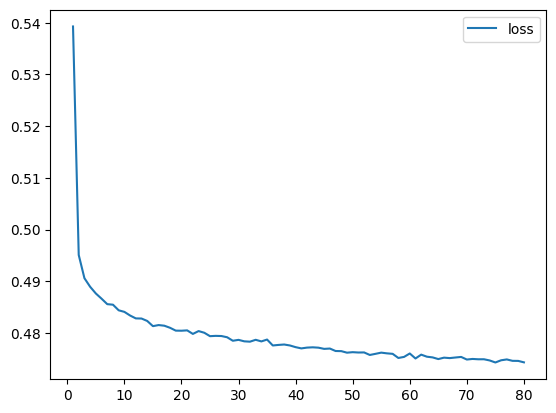

In [20]:
# Create a dataframe containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the indext by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
# plt.ylim(0,1)
plt.show

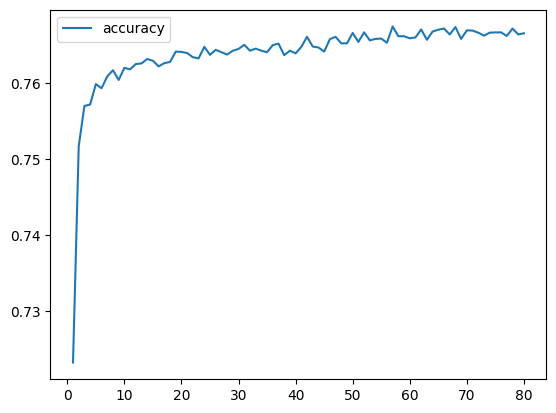

In [21]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [22]:
# Save model to HDF5 file
nn_model_opt_3.save('models/AlphabetSoupCharity_optimisation_3.h5')

In [23]:
# Export our model to HDF5 file
from google.colab import files
files.download('models/AlphabetSoupCharity_optimisation_3.h5')
files.download('models_weights_optimisation_3/weights.05.hdf5')
files.download('models_weights_optimisation_3/weights.10.hdf5')
files.download('models_weights_optimisation_3/weights.15.hdf5')
files.download('models_weights_optimisation_3/weights.20.hdf5')
files.download('models_weights_optimisation_3/weights.25.hdf5')
files.download('models_weights_optimisation_3/weights.30.hdf5')
files.download('models_weights_optimisation_3/weights.35.hdf5')
files.download('models_weights_optimisation_3/weights.40.hdf5')
files.download('models_weights_optimisation_3/weights.45.hdf5')
files.download('models_weights_optimisation_3/weights.50.hdf5')
files.download('models_weights_optimisation_3/weights.55.hdf5')
files.download('models_weights_optimisation_3/weights.60.hdf5')
files.download('models_weights_optimisation_3/weights.65.hdf5')
files.download('models_weights_optimisation_3/weights.70.hdf5')
files.download('models_weights_optimisation_3/weights.75.hdf5')
files.download('models_weights_optimisation_3/weights.80.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>